In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
plt.rcParams['figure.figsize'] = (12,8)
default_plot_colour = "#00bfbf"

In [7]:
data = pd.read_csv('fake_news_data.csv')

In [8]:
data.head()

,title,text,date,fake_or_factual
0,HOLLYWEIRD LIB SUSAN SARANDON Compares Muslim ...,There are two small problems with your analogy...,"Dec 30, 2015",Fake News
1,Elijah Cummings Called Trump Out To His Face ...,Buried in Trump s bonkers interview with New Y...,"April 6, 2017",Fake News
2,Hillary Clinton Says Half Her Cabinet Will Be...,"Women make up over 50 percent of this country,...","April 26, 2016",Fake News
3,Russian bombing of U.S.-backed forces being di...,WASHINGTON (Reuters) - U.S. Defense Secretary ...,"September 18, 2017",Factual News
4,Britain says window to restore Northern Irelan...,BELFAST (Reuters) - Northern Ireland s politic...,"September 4, 2017",Factual News


Text(0, 0.5, 'Count')

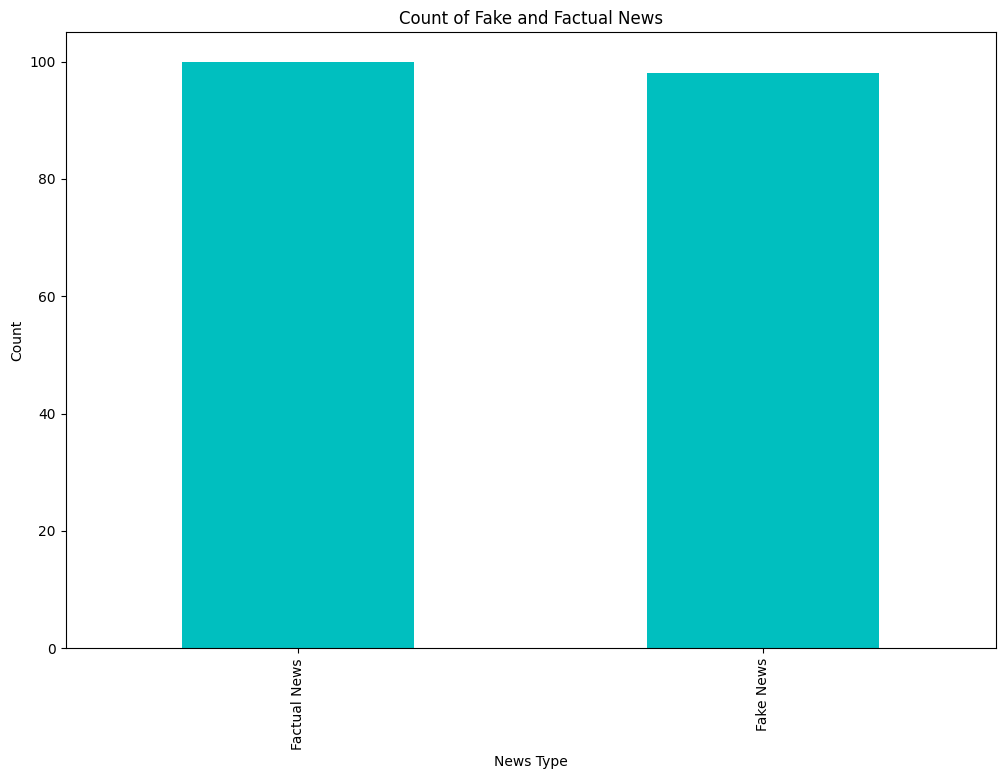

In [9]:
data['fake_or_factual'].value_counts().plot(kind='bar', color=default_plot_colour)
plt.title('Count of Fake and Factual News')
plt.xlabel('News Type')
plt.ylabel('Count')

POS TAGGING

In [10]:
import spacy

In [11]:
nlp = spacy.load('en_core_web_sm')

In [12]:
fake_news = data[data['fake_or_factual'] == 'Fake News']
fact_news = data[data['fake_or_factual'] == 'Factual News']

In [13]:
fake_spaceydocs = list(nlp.pipe(fake_news['text']))
fact_spaceydocs = list(nlp.pipe(fact_news['text']))

In [14]:
fake_spaceydocs

[There are two small problems with your analogy Susan  Jesus was NOT a Muslim and Joseph traveled to Bethlehem with Mary. For anyone who s not paying attention there don t appear to be many female refugees accompanying male Muslim  refugees  to Greece.Susan Sarandon spent the Christmas holiday on the Greek island of Lesbos assisting international organizations with the mounting Syrian refugee crisis   a crisis, she says, that recalls the travails of Joseph and Mary on their way to the Inn in Bethlehem.In a column for the Huffington Post and RYOT, the 69-year-old Oscar-winning actress described meeting a 16-year-old girl who had apparently given birth shortly before arriving on the island. I smile and approach her, but without a translator, our conversation is basic-friendly,  Sarandon wrote of her experience.  She takes the bundle next to her and opens it to me. Inside is a perfect, rosy, newborn. The actress continues:She is beaming, so proud. How did this young girl, just having give

In [15]:
def extract_token_tags(doc:spacy.tokens.doc.Doc):
  return [(i.text, i.ent_type_, i.pos_) for i in doc]

In [16]:
fake_tagsdf = []
columns = ['token', 'ner_tag', 'pos']

for ix, doc in enumerate(fake_spaceydocs):
  tags = extract_token_tags(doc)
  tags = pd.DataFrame(tags)
  tags.columns = columns
  fake_tagsdf.append(tags)

fake_tagsdf = pd.concat(fake_tagsdf)


fact_tagsdf = []

for ix, doc in enumerate(fact_spaceydocs):
  tags = extract_token_tags(doc)
  tags = pd.DataFrame(tags)
  tags.columns = columns
  fact_tagsdf.append(tags)

fact_tagsdf = pd.concat(fact_tagsdf)

In [17]:
fact_tagsdf.head()

,token,ner_tag,pos
0,WASHINGTON,GPE,PROPN
1,(,,PUNCT
2,Reuters,ORG,PROPN
3,),,PUNCT
4,-,,PUNCT


In [18]:
fake_tagsdf.head(

)

,token,ner_tag,pos
0,There,,PRON
1,are,,VERB
2,two,CARDINAL,NUM
3,small,,ADJ
4,problems,,NOUN


In [19]:
pos_count_fake = fake_tagsdf.groupby(['token', 'pos']).size().reset_index(name='count').sort_values('count', ascending=False)
pos_count_fact = fact_tagsdf.groupby(['token', 'pos']).size().reset_index(name='count').sort_values('count', ascending=False)

In [20]:
pos_count_fact.head()

,token,pos,count
6145,the,DET,1903
14,",",PUNCT,1698
21,.,PUNCT,1382
4716,of,ADP,884
1898,a,DET,789


In [21]:
pos_count_fake.head()

,token,pos,count
29,",",PUNCT,1908
7451,the,DET,1834
41,.,PUNCT,1530
5766,of,ADP,922
2665,and,CCONJ,875


In [22]:
pos_count_fake.groupby(['pos'])['token'].size().sort_values(ascending=False).head(
)

,token
pos,
NOUN,2586
VERB,1817
PROPN,1672
ADJ,882
ADV,413


In [23]:
pos_count_fact.groupby(['pos'])['token'].size().sort_values(ascending=False).head()

,token
pos,
NOUN,2179
VERB,1539
PROPN,1379
ADJ,747
ADV,263


In [24]:
pos_count_fake[pos_count_fake.pos == "NOUN"][:10]

,token,pos,count
5981,people,NOUN,77
7349,t,NOUN,65
6216,president,NOUN,58
7960,women,NOUN,55
7516,time,NOUN,52
8011,year,NOUN,44
3138,campaign,NOUN,44
4581,government,NOUN,41
5213,law,NOUN,40
8013,years,NOUN,40


In [25]:
pos_count_fact[pos_count_fact.pos == "NOUN"][:10]

,token,pos,count
3738,government,NOUN,71
6618,year,NOUN,64
5901,state,NOUN,57
2360,bill,NOUN,55
1975,administration,NOUN,51
5066,president,NOUN,49
3277,election,NOUN,48
4919,people,NOUN,45
4786,order,NOUN,45
2497,campaign,NOUN,42


TOP NAMED ENTITIES


In [26]:
top_entities_fake = fake_tagsdf[fake_tagsdf.ner_tag != ''].groupby(['token', 'ner_tag']).size().reset_index(name='count').sort_values('count', ascending=False)

In [27]:
top_entities_fake

,token,ner_tag,count
1730,Trump,PERSON,154
1729,Trump,ORG,152
2129,the,ORG,121
592,Clinton,PERSON,118
718,Donald,PERSON,75
...,...,...,...
404,Automobile,ORG,1
403,Austen,ORG,1
1082,Lawrence,PERSON,1
1112,Lockup,PERSON,1


In [28]:
top_entities_fact = fact_tagsdf[fact_tagsdf.ner_tag != ''].groupby(['token', 'ner_tag']).size().reset_index(name='count').sort_values('count', ascending=False)

In [29]:
top_entities_fact.head()

,token,ner_tag,count
1968,the,ORG,159
1633,U.S.,GPE,138
1373,Reuters,ORG,131
1615,Trump,PERSON,125
1614,Trump,ORG,124


In [30]:
!pip install seaborn

In [31]:
import seaborn as sns
ner_palette = {
    'ORG': sns.color_palette("Set2").as_hex()[0],
    'GPE': sns.color_palette("Set2").as_hex()[1],
    'NORP': sns.color_palette("Set2").as_hex()[2],
    'PERSON': sns.color_palette("Set2").as_hex()[3],
    'DATE': sns.color_palette("Set2").as_hex()[4],
    'CARDINAL': sns.color_palette("Set2").as_hex()[5],
    'PERCENT': sns.color_palette("Set2").as_hex()[6]
}

<Axes: xlabel='count', ylabel='token'>

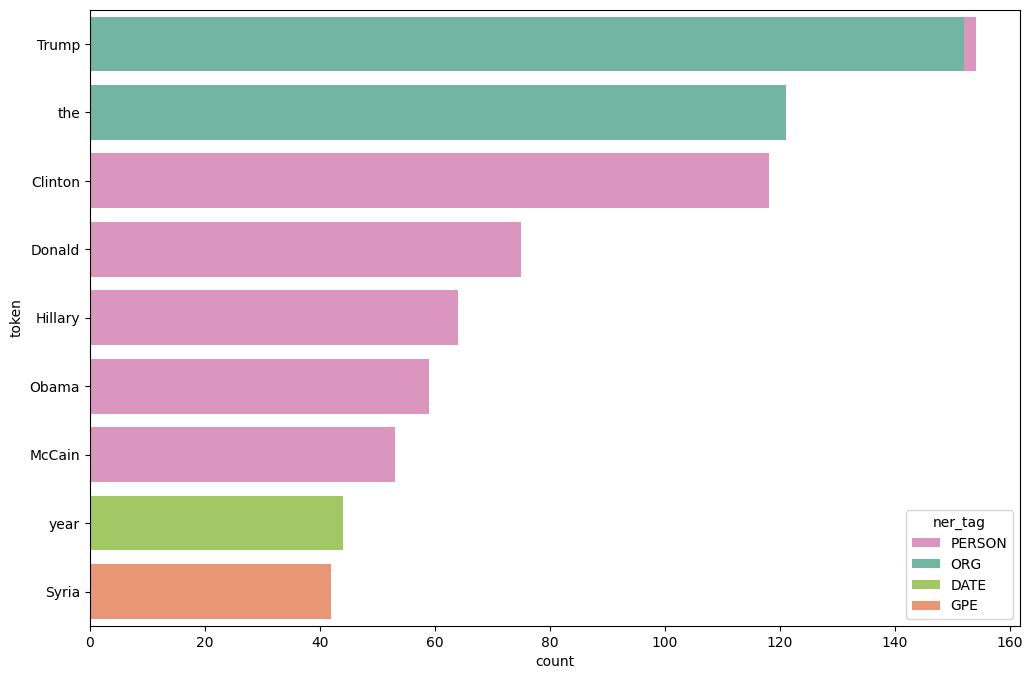

In [32]:
sns.barplot(
    x='count',
    y='token',
    hue='ner_tag',
    data=top_entities_fake[:10],
    orient='h',
    dodge=False,
    palette=ner_palette
)


<Axes: xlabel='count', ylabel='token'>

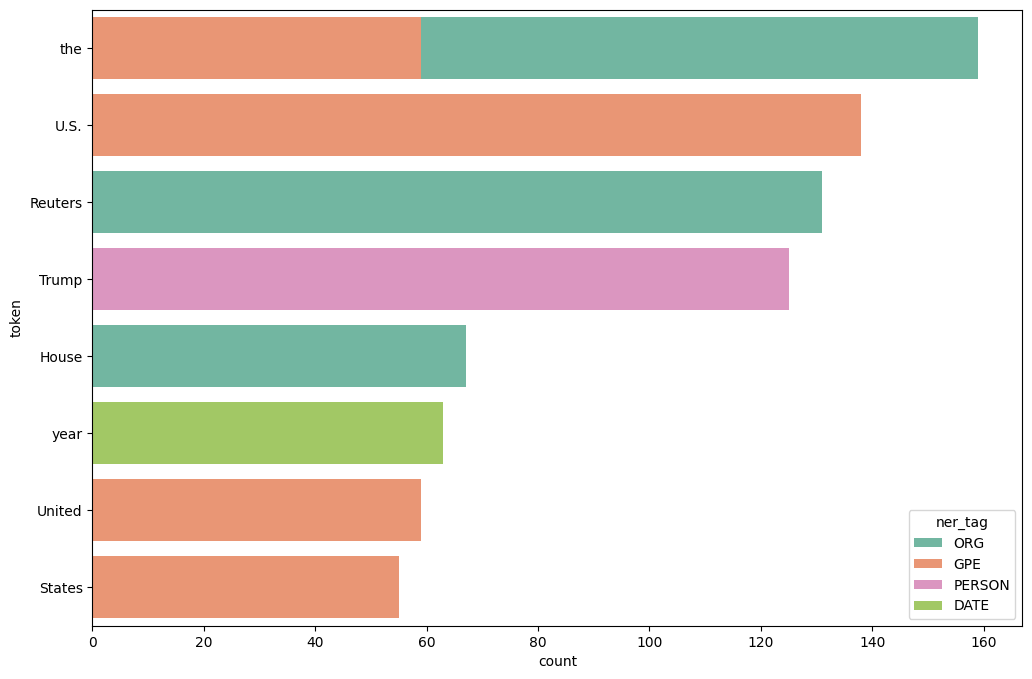

In [33]:
sns.barplot(
    x='count',
    y='token',
    hue='ner_tag',
    data=top_entities_fact[:10],
    orient='h',
    dodge=False,
    palette=ner_palette
)

# TEXT PREPROCESSING

In [34]:
data.head()

,title,text,date,fake_or_factual
0,HOLLYWEIRD LIB SUSAN SARANDON Compares Muslim ...,There are two small problems with your analogy...,"Dec 30, 2015",Fake News
1,Elijah Cummings Called Trump Out To His Face ...,Buried in Trump s bonkers interview with New Y...,"April 6, 2017",Fake News
2,Hillary Clinton Says Half Her Cabinet Will Be...,"Women make up over 50 percent of this country,...","April 26, 2016",Fake News
3,Russian bombing of U.S.-backed forces being di...,WASHINGTON (Reuters) - U.S. Defense Secretary ...,"September 18, 2017",Factual News
4,Britain says window to restore Northern Irelan...,BELFAST (Reuters) - Northern Ireland s politic...,"September 4, 2017",Factual News


In [35]:
import re
data['text_clean'] = data['text'].str.lower()

In [36]:
data.head()

,title,text,date,fake_or_factual,text_clean
0,HOLLYWEIRD LIB SUSAN SARANDON Compares Muslim ...,There are two small problems with your analogy...,"Dec 30, 2015",Fake News,there are two small problems with your analogy...
1,Elijah Cummings Called Trump Out To His Face ...,Buried in Trump s bonkers interview with New Y...,"April 6, 2017",Fake News,buried in trump s bonkers interview with new y...
2,Hillary Clinton Says Half Her Cabinet Will Be...,"Women make up over 50 percent of this country,...","April 26, 2016",Fake News,"women make up over 50 percent of this country,..."
3,Russian bombing of U.S.-backed forces being di...,WASHINGTON (Reuters) - U.S. Defense Secretary ...,"September 18, 2017",Factual News,washington (reuters) - u.s. defense secretary ...
4,Britain says window to restore Northern Irelan...,BELFAST (Reuters) - Northern Ireland s politic...,"September 4, 2017",Factual News,belfast (reuters) - northern ireland s politic...


In [37]:
data['text_clean'] = data['text_clean'].apply(lambda x: re.sub(r'^[^-]*-\s*', "", x))

In [38]:
data.head()

,title,text,date,fake_or_factual,text_clean
0,HOLLYWEIRD LIB SUSAN SARANDON Compares Muslim ...,There are two small problems with your analogy...,"Dec 30, 2015",Fake News,year-old oscar-winning actress described meeti...
1,Elijah Cummings Called Trump Out To His Face ...,Buried in Trump s bonkers interview with New Y...,"April 6, 2017",Fake News,buried in trump s bonkers interview with new y...
2,Hillary Clinton Says Half Her Cabinet Will Be...,"Women make up over 50 percent of this country,...","April 26, 2016",Fake News,"women make up over 50 percent of this country,..."
3,Russian bombing of U.S.-backed forces being di...,WASHINGTON (Reuters) - U.S. Defense Secretary ...,"September 18, 2017",Factual News,u.s. defense secretary jim mattis said on mond...
4,Britain says window to restore Northern Irelan...,BELFAST (Reuters) - Northern Ireland s politic...,"September 4, 2017",Factual News,northern ireland s political parties are rapid...


In [39]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [40]:
en_stopwords = stopwords.words('english')
data['text_clean'] = data['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in en_stopwords]))
data['text_clean'].head()

,text_clean
0,year-old oscar-winning actress described meeti...
1,buried trump bonkers interview new york times ...
2,"women make 50 percent country, grossly underre..."
3,u.s. defense secretary jim mattis said monday ...
4,northern ireland political parties rapidly run...


In [41]:
data['text_clean'] = data.apply(lambda x: re.sub(r"([^\w\s])", "", x['text_clean']), axis=1)
data.head()

,title,text,date,fake_or_factual,text_clean
0,HOLLYWEIRD LIB SUSAN SARANDON Compares Muslim ...,There are two small problems with your analogy...,"Dec 30, 2015",Fake News,yearold oscarwinning actress described meeting...
1,Elijah Cummings Called Trump Out To His Face ...,Buried in Trump s bonkers interview with New Y...,"April 6, 2017",Fake News,buried trump bonkers interview new york times ...
2,Hillary Clinton Says Half Her Cabinet Will Be...,"Women make up over 50 percent of this country,...","April 26, 2016",Fake News,women make 50 percent country grossly underrep...
3,Russian bombing of U.S.-backed forces being di...,WASHINGTON (Reuters) - U.S. Defense Secretary ...,"September 18, 2017",Factual News,us defense secretary jim mattis said monday ru...
4,Britain says window to restore Northern Irelan...,BELFAST (Reuters) - Northern Ireland s politic...,"September 4, 2017",Factual News,northern ireland political parties rapidly run...


In [42]:
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
data['text_clean'] = data['text_clean'].apply(lambda x: word_tokenize(x))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [43]:
data['text_clean'].head()

,text_clean
0,"[yearold, oscarwinning, actress, described, me..."
1,"[buried, trump, bonkers, interview, new, york,..."
2,"[women, make, 50, percent, country, grossly, u..."
3,"[us, defense, secretary, jim, mattis, said, mo..."
4,"[northern, ireland, political, parties, rapidl..."


In [44]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
data['text_clean'] = data['text_clean'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
data['text_clean']

[nltk_data] Downloading package wordnet to /root/nltk_data...


,text_clean
0,"[yearold, oscarwinning, actress, described, me..."
1,"[buried, trump, bonkers, interview, new, york,..."
2,"[woman, make, 50, percent, country, grossly, u..."
3,"[u, defense, secretary, jim, mattis, said, mon..."
4,"[northern, ireland, political, party, rapidly,..."
...,...
193,"[yearold, appeared, reality, tv, show, sister,..."
194,"[wing, group, american, legislative, exchange,..."
195,"[andneck, race, hillary, clinton, bernie, sand..."
196,"[former, fbi, director, james, comey, requeste..."


In [45]:
tokens_clean = sum(data['text_clean'], [])
unigrams = (pd.Series(nltk.ngrams(tokens_clean, 1)).value_counts()).reset_index()


In [46]:
print(unigrams)

              index  count
0           (said,)    560
1          (trump,)    520
2              (u,)    255
3          (state,)    250
4      (president,)    226
...             ...    ...
8655   (appealing,)      1
8656   (effecting,)      1
8657   (changeorg,)      1
8658  (undeterred,)      1
8659       (skill,)      1

[8660 rows x 2 columns]


In [47]:
bigrams = (pd.Series(nltk.ngrams(tokens_clean, 2)).value_counts()).reset_index()
print(bigrams)

                          index  count
0               (donald, trump)     92
1               (united, state)     80
2                (white, house)     72
3           (president, donald)     42
4                   (new, york)     31
...                         ...    ...
34173    (alexandria, virginia)      1
34174  (prosecutor, alexandria)      1
34175   (confirmed, prosecutor)      1
34176   (previously, confirmed)      1
34177      (possibility, probe)      1

[34178 rows x 2 columns]


# SENTIMENT ANALYSIS

In [48]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.8 MB/s eta 0:00:00


In [49]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [50]:
vader_sentiment = SentimentIntensityAnalyzer()

In [51]:
data['vader_sentiment_score'] = data['text'].apply(lambda x: vader_sentiment.polarity_scores(x)['compound'])

In [52]:
data['vader_sentiment_score'].head()

,vader_sentiment_score
0,-0.3660
1,-0.8197
2,0.9779
3,-0.3400
4,0.8590


In [53]:
bins = [-1, -0.1, 0.1, 1]
labels = ['negative', 'neutral', 'positive']

data['vader_sentiment_label'] = pd.cut(data['vader_sentiment_score'], bins=bins, labels=labels)

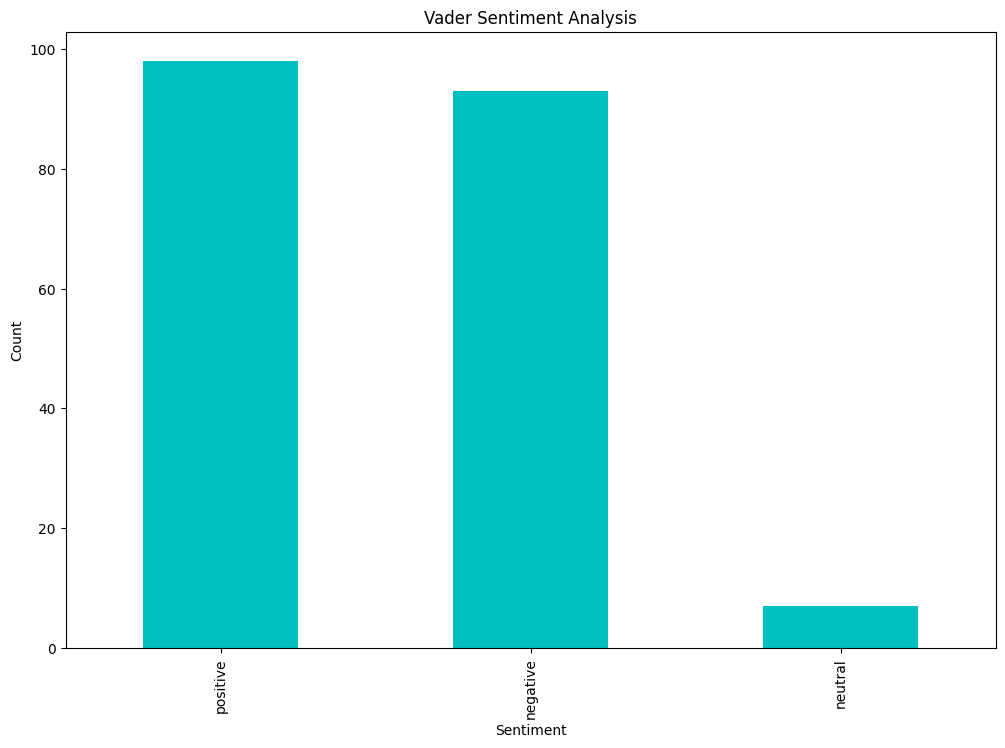

In [54]:
data['vader_sentiment_label'].value_counts().plot(kind='bar', color=default_plot_colour)
plt.title('Vader Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [55]:
data.head(

)

,title,text,date,fake_or_factual,text_clean,vader_sentiment_score,vader_sentiment_label
0,HOLLYWEIRD LIB SUSAN SARANDON Compares Muslim ...,There are two small problems with your analogy...,"Dec 30, 2015",Fake News,"[yearold, oscarwinning, actress, described, me...",-0.3660,negative
1,Elijah Cummings Called Trump Out To His Face ...,Buried in Trump s bonkers interview with New Y...,"April 6, 2017",Fake News,"[buried, trump, bonkers, interview, new, york,...",-0.8197,negative
2,Hillary Clinton Says Half Her Cabinet Will Be...,"Women make up over 50 percent of this country,...","April 26, 2016",Fake News,"[woman, make, 50, percent, country, grossly, u...",0.9779,positive
3,Russian bombing of U.S.-backed forces being di...,WASHINGTON (Reuters) - U.S. Defense Secretary ...,"September 18, 2017",Factual News,"[u, defense, secretary, jim, mattis, said, mon...",-0.3400,negative
4,Britain says window to restore Northern Irelan...,BELFAST (Reuters) - Northern Ireland s politic...,"September 4, 2017",Factual News,"[northern, ireland, political, party, rapidly,...",0.8590,positive


# FAKE OR FACT NEWS ??!!

In [56]:
X = [','.join(map(str, l)) for l in data['text_clean']]
y = data['fake_or_factual']

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

In [58]:
countvec = CountVectorizer()
countvec_fit = countvec.fit_transform(X)
bag_of_words = pd.DataFrame(countvec_fit.toarray(), columns=countvec.get_feature_names_out())
bag_of_words

,01,03,05,08441,10,100,1000,10000,1000000000000000,1002,...,zimbabwe,zimbabwean,zimmerman,zina,zionism,zoe,zone,zoom,zouka,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
194,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


logistic regression

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bag_of_words, y, test_size=0.3)

In [60]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0).fit(X_train,y_train)

In [69]:
y_pred_lr = lr.predict(X_test)
y_pred_lr
y_test

,fake_or_factual
77,Fake News
167,Factual News
195,Fake News
197,Fake News
123,Factual News
59,Factual News
171,Fake News
1,Fake News
74,Factual News
57,Fake News


In [62]:
from sklearn.metrics import accuracy_score, classification_report

accuracy_score(y_pred_lr, y_test)

0.9

In [63]:
print(classification_report(y_pred_lr, y_test))

              precision    recall  f1-score   support

Factual News       0.90      0.90      0.90        31
   Fake News       0.90      0.90      0.90        29

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



naive bayes

In [64]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB().fit(X_train, y_train)

In [65]:
y_pred_lr = nb.predict(X_test)

In [66]:
accuracy_score(y_pred_lr, y_test)

0.9

In [67]:
print(classification_report(y_pred_lr, y_test))

              precision    recall  f1-score   support

Factual News       0.97      0.86      0.91        35
   Fake News       0.83      0.96      0.89        25

    accuracy                           0.90        60
   macro avg       0.90      0.91      0.90        60
weighted avg       0.91      0.90      0.90        60

